## Movie Recommedation System using User Movie Ratings Data


# Using KNN Clustering

  > Collaborate Filtering Recommedation Engine
  > Content Based filtering Recommedaton Engine
  > Hybrid model
  
# Collaborative Filtering Recommedation Engine

This is a recommendation system that creates a prediction based on a user's preveious behaviors

A recommender system suggests which text should be read next, which movie should be watched, and which product should be bought, creating a stickiness
factor to any product or service. Its unique algorithms are designed to predict a user's interest and suggest different products to the users in many different ways and retain that interest till the end.

Collaborative filtering needs a set of items that are based on user's historical choices.This system does not require a good amount of product features to work. An embedding or feature vector describes each item and User, and it sinks both the items and the users in a similar embedding locaton.It creates enclosures for items and users on its own.It keeps track of the behavior of all users before recommending which item is mostly liked by users.

Two sources are used to record the interaction of a product user.
  1. Through implicit feedback, User likes and dislikes are recorded and noticed by their actions like clicks, listening to music tracks, searches, purchase records, page views, etc.
  2. Explicit feedback is when a customer specifies dislikes or likes by rating or reacting against any specific product on a scale of 1 to 5 stars
  
 # Content-based filtering
 Many product's features are required to implement content-based filtering instead of user feedback or interaction. It is a ML technique that is used to decide the outcomes based on product similarities.
 
 Content-based filtering algorithms are designed to recommend products based on the accumulated knowledge of users. It is all about comparing user interest with product features
 
 
# Hybrid Filtering
 This is a mixture of collaborative and content-based filtering methods while making suggestions.The data consist of aggregating similar calculations



In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np


Importing Datasets

Context - The datasets describes ratings and free-text tagging activities from MovieLens, a movie recommendaton service. It contains 20000263 ratings and 465564 tag applications across 27278 movies.

Users were selected at random for inclusion. All selected users had rated at least 20 movies

In [2]:
import os
for dirname, _ , filenames in os.walk('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\Blue Business Creative Practical Template.pdf
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\dataset.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\genome_scores.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\genome_tags.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\grades.txt
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\heights and weights (2).csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\KEIR81FL.DTA
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\laterite_mobilemoney_data.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\Law Enforcement Perceptions of Drug Addiction.xlsx
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\link.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\logdata.txt
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\movie.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\netflix_titles.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\rating.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\sampleSubmission.csv
C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES\SOCR-

In [3]:
# usecols allows us to select our choice of features
movies_df=pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/movie.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
ratings_df=pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/rating.csv', usecols=['userId','movieId','rating','timestamp'], dtype={'userId':'int32','movieId':'int32','rating':'float32'})
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
#checking for NAN values
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [6]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (27278, 2)
Ratings: (20000263, 4)


# Merging the imported Datasets for analysis

In [8]:
movies_df.info()
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int32 
 1   title    27278 non-null  object
dtypes: int32(1), object(1)
memory usage: 319.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  object 
dtypes: float32(1), int32(2), object(1)
memory usage: 381.5+ MB


In [10]:
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41


In [15]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Small Roads (2011),5.0
1,Divorce (1945),5.0
2,The Beautiful Story (1992),5.0
3,Into the Middle of Nowhere (2010),5.0
4,The Sea That Thinks (2000),5.0


In [16]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'})
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,貞子3D (2012),1,1.5
1,Lucky Jordan (1942),1,3.0
2,Born to Defense (Zhong hua ying xiong) (1986),1,3.5
3,"Luck, Trust & Ketchup: Robert Altman in Carver...",1,4.0
4,Lowlands (Tiefland) (1954),1,3.5


## Observation

 > Many moies have a perfect 5 star average rating on a dataset of almost 100k user ratings.This suggests the existence of outliers which we need to further confirm with visualization.
 > The presence of single ratings for several movies suggests that i set a threshold value of ratings to produce aluable recommendatons.
 
To further understand my data, I'll create a pandas profiling report for the whole dataset.

In [13]:
from pandas_profiling import ProfileReport

In [ ]:
movies_merged_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### Data Visualization

I will create plots to make observations and analyz the trends in the data

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

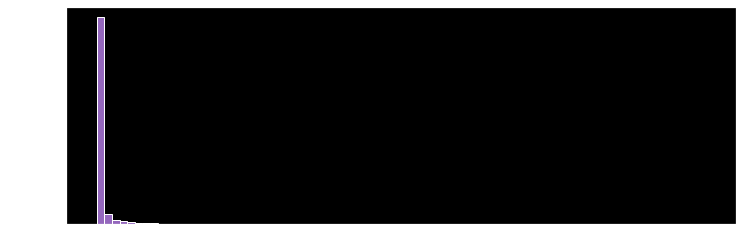

In [17]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

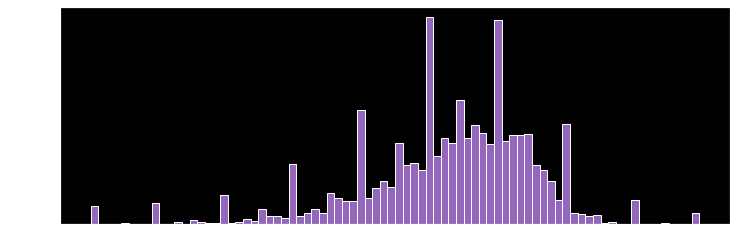

In [18]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'], bins=80, color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

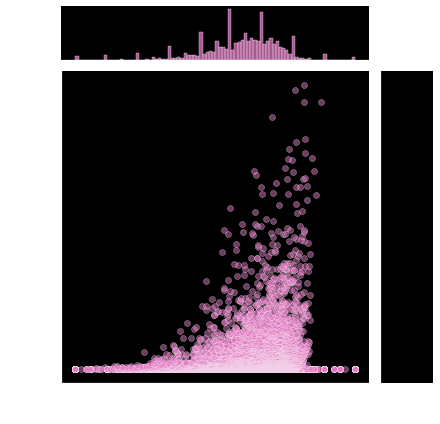

In [20]:
plot=sns.jointplot(x='Average Rating', y='Rating Count', data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

## Analysis
* Plot #1 confirms our observations of a high volume of movies with low ratings count.Apart from setting a threshold, we can also use quantiles at some higher percentile for this usecase
* Histogram #2 showcases the distribution function of the Average Rating values.
* Jointplot beautifully illustrates that there is only a subset of values with higher rating that have considerable amount of ratings.


## Eliminating Outliers(less popular movies)

In [22]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47,49695
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52,49695
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51,49695
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47,49695
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41,49695


In [23]:
pd.set_option('display.float_format', lambda x: '%.3f'% x)
print(rating_with_RatingCount['Rating Count'].describe())

count   20000263.000
mean       13480.715
std        14111.933
min            1.000
25%         2963.000
50%         8505.000
75%        19674.000
max        67310.000
Name: Rating Count, dtype: float64


In [24]:
popularity_threshold = 50
popular_movies = rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),3,4.000,1999-12-11 13:36:47,49695
1,1,Toy Story (1995),6,5.000,1997-03-13 17:50:52,49695
2,1,Toy Story (1995),8,4.000,1996-06-05 13:37:51,49695
3,1,Toy Story (1995),10,4.000,1999-11-25 02:44:47,49695
4,1,Toy Story (1995),11,4.500,2009-01-02 01:13:41,49695


## Pivoting title as indices & userid as columns

In [ ]:
import os
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

## Implementing kNN Model

In [ ]:
from scipy.sparse import csr_matrix
